# MANE 4962 HW6

Ruiyang Zhou

RIN: 662005044


## Problem 1

### 1(a)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
import pandas as pd

# Load wine data
wine = load_wine()
wine_data = wine.data

# Initialize PCA model
pca = PCA(n_components=2)

# Fit and transform data to get the first two principal components
principal_components = pca.fit_transform(wine_data)
pc_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])
print(pc_df.head())


          PC1        PC2
0  318.562979  21.492131
1  303.097420  -5.364718
2  438.061133  -6.537309
3  733.240139   0.192729
4  -11.571428  18.489995


### 1(b)

In [ ]:
print(pca.explained_variance_ratio_)


[0.99809123 0.00173592]


### 1(c)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(principal_components, wine.target, test_size=0.4, random_state=42)

# Initialize and train SVM classifier
svm_clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm_clf.fit(X_train, y_train)

# Evaluate the classifier
print(svm_clf.score(X_test, y_test))


0.7638888888888888


### 1(d)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Split original data into training and testing sets
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(wine_data, wine.target, test_size=0.4, random_state=42)

# Initialize and train decision tree classifier
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X_train_orig, y_train_orig)

# Evaluate the classifier
print(tree_clf.score(X_test_orig, y_test_orig))


0.9305555555555556


### 1(e)

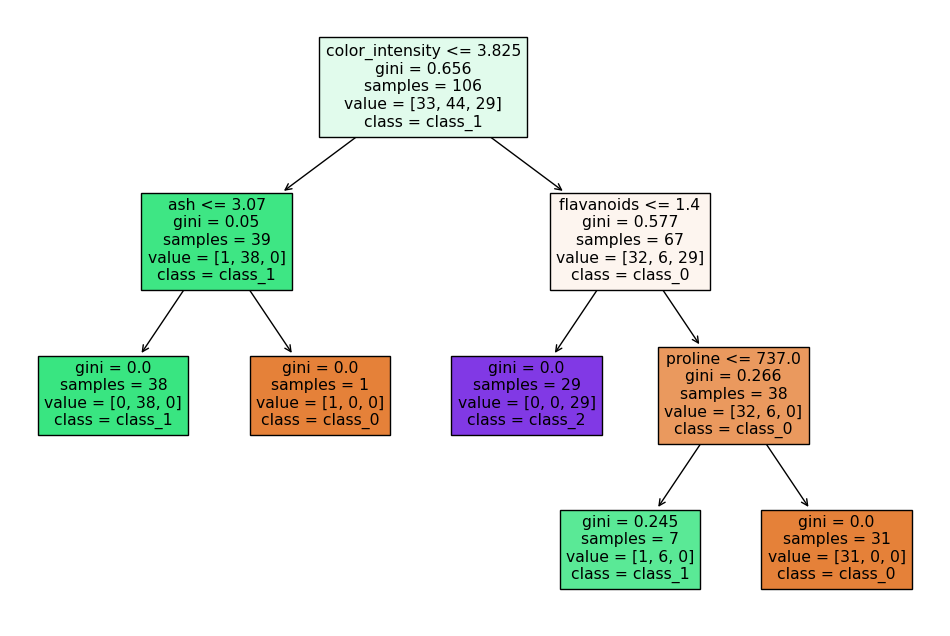

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plot_tree(tree_clf, filled=True, feature_names=wine.feature_names, class_names=wine.target_names)
plt.show()


## Problem 2

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from keras.datasets import cifar10
import numpy as np

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Flatten images for Random Forest
x_train_flat = x_train.reshape((x_train.shape[0], -1))
x_test_flat = x_test.reshape((x_test.shape[0], -1))
y_train_flat = y_train.ravel()
y_test_flat = y_test.ravel()

# Combine train and test sets
X = np.concatenate((x_train_flat, x_test_flat))
Y = np.concatenate((y_train_flat, y_test_flat))

# Train Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, Y)

# Print feature importance
print(rf.feature_importances_)


170498071/170498071 [==============================] - 11s 0us/step
[0.00029222 0.00028866 0.00039641 ... 0.00040679 0.00031969 0.00041299]


## Problem 3

In [1]:
# Load temperature data (assuming numpy format)
import numpy as np

data = np.load('/content/surface_temp.npy')

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data.reshape(-1, 1))

# Define the sequence length (number of timesteps)
sequence_length = 10

# Generate data sequences
generator = TimeseriesGenerator(data_scaled, data_scaled,
                                length=sequence_length,
                                batch_size=1)



model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(sequence_length, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(generator, epochs=100)


# Function to predict future steps
def predict_future(model, data, steps=10, sequence_length=10):
    future = data[-sequence_length:].tolist()
    for _ in range(steps):
        x = np.array(future[-sequence_length:]).reshape(1, sequence_length, 1)
        pred = model.predict(x)[0]
        future.append(pred)
    return future[sequence_length:]

# Predict next 10 temperatures
future_temps = predict_future(model, data_scaled, steps=10, sequence_length=sequence_length)

# Inverse transform to original scale
future_temps_scaled = scaler.inverse_transform(np.array(future_temps).reshape(-1, 1))

print(future_temps_scaled)


# Data preprocessing (normalization, train-test split, reshaping for RNN, etc.)

# Define RNN model in TensorFlow or PyTorch

# Train model

# Predict next 10 timesteps


Epoch 1/100
990/990 [==============================] - 5s 3ms/step - loss: 0.0157
Epoch 2/100
990/990 [==============================] - 4s 4ms/step - loss: 0.0092
Epoch 3/100
990/990 [==============================] - 4s 5ms/step - loss: 0.0083
Epoch 4/100
990/990 [==============================] - 3s 3ms/step - loss: 0.0078
Epoch 5/100
990/990 [==============================] - 5s 5ms/step - loss: 0.0074
Epoch 6/100
990/990 [==============================] - 4s 4ms/step - loss: 0.0073
Epoch 7/100
990/990 [==============================] - 4s 4ms/step - loss: 0.0068
Epoch 8/100
990/990 [==============================] - 4s 4ms/step - loss: 0.0067
Epoch 9/100
990/990 [==============================] - 4s 4ms/step - loss: 0.0068
Epoch 10/100
990/990 [==============================] - 4s 4ms/step - loss: 0.0063
Epoch 11/100
990/990 [==============================] - 5s 5ms/step - loss: 0.0064
Epoch 12/100
990/990 [==============================] - 4s 4ms/step - loss: 0.0059
Epoch 13/100
